In [72]:
from numpy.lib.function_base import average
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

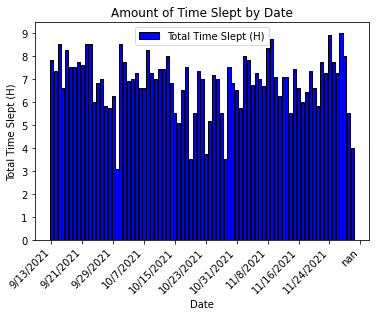

Small Index: [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]
small_dates ['9/13/2021', '9/21/2021', '9/29/2021', '10/7/2021', '10/15/2021', '10/23/2021', '10/31/2021', '11/8/2021', '11/16/2021', '11/24/2021', nan]


<Figure size 432x288 with 0 Axes>

In [73]:
sleep_data = pd.read_csv("Sleep Data.csv")
sleep_data_df = pd.DataFrame(sleep_data)

dates_list = []
index_list = []
small_index = []
small_dates = []

def create_bar_graph(list_numbers, graph_label, title, filename):
    x = list(range(len(list_numbers)))
    plt.figure()
    
    for y in range(len(sleep_data)):
        dates_list.append(sleep_data.at[y, "Date"])
        index_list.append(y)

    for y in range(0,len(dates_list), 8):
        small_index.append(index_list[y])
        small_dates.append(dates_list[y])

    plt.bar(x, list_numbers, facecolor="blue", edgecolor="black", label=graph_label)
    plt.xticks(small_index,small_dates,rotation=45,ha="right")
    plt.yticks(list(range(10)))
    plt.xlabel("Date")
    plt.ylabel("Total Time Slept (H)")
    plt.title(title)
    plt.legend()
    plt.show()
    plt.savefig(filename)
    #print("Dates List:", dates_list)
    #print("Index List:", index_list)
    print("Small Index:", small_index)
    print("small_dates", small_dates)

total_sleep_data = []   
for x in range(len(sleep_data)):
    total_sleep_data.append(sleep_data.at[x, "Total Time Slept (H)"])

create_bar_graph(total_sleep_data, "Total Time Slept (H)", "Amount of Time Slept by Date", "Total Sleep Data")

In [74]:
def weekend_graph(list_of_data, x_label, title, filename):

    weekend_sleep = []
    weekday_sleep = []
    weekend_sleep_dates = []
    weekday_sleep_dates = []

    for x in range(len(sleep_data)):
        if ("Friday" in sleep_data.at[x, "Day"] or "Saturday" in sleep_data.at[x, "Day"]):
            weekend_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])
            weekend_sleep_dates.append(sleep_data.at[x,"Date"])

    for x in range(len(sleep_data)):
        if ("Sunday" in sleep_data.at[x, "Day"] or "Monday" in sleep_data.at[x, "Day"] or "Tuesday" in sleep_data.at[x, "Day"] or "Wednesday" in sleep_data.at[x, "Day"] or "Thursday" in sleep_data.at[x, "Day"]):
            weekday_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])
            weekday_sleep_dates.append(sleep_data.at[x,"Date"])

    x = list(range(len(list_of_data)))
    plt.figure()
    graph_label = "Total Time Slept (H)"
    plt.bar(x, list_of_data, facecolor="red", edgecolor="black", label=graph_label)
    #plt.xticks([weekend_sleep_dates])
    plt.yticks([0,9])
    plt.xlabel(x_label)
    plt.ylabel("Total Time Slept (H)")
    plt.title(title)
    plt.legend()
    plt.show()
    plt.savefig(filename)
# weekend_graph(weekend_sleep, "Date (Fridays & Saturdays)", "Amount of Time Slept by Weekend (Friday, Saturday)", "BAR CHART")
# weekend_graph(weekday_sleep, "Date (S,M,T,W,Th)", "Amount of Time Slept by Weekday (Sunday-Thursday)", "BAR CHART")

Monday


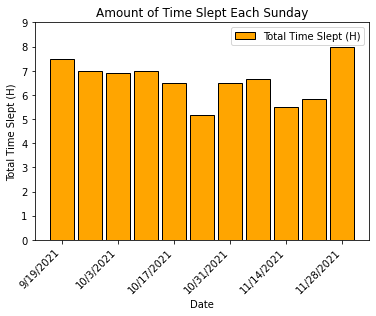

Monday


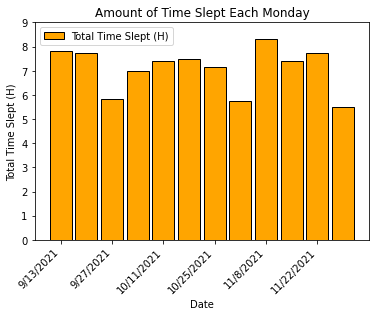

Monday


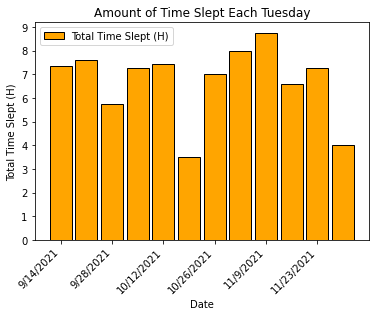

Monday


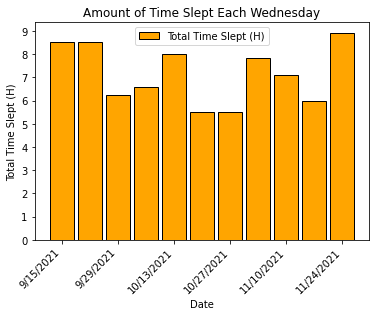

Monday


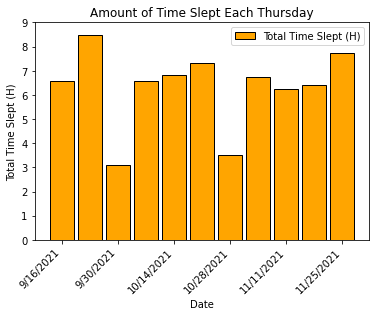

Monday


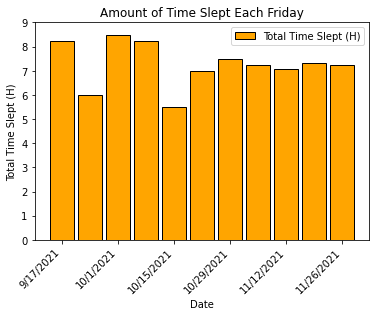

Monday


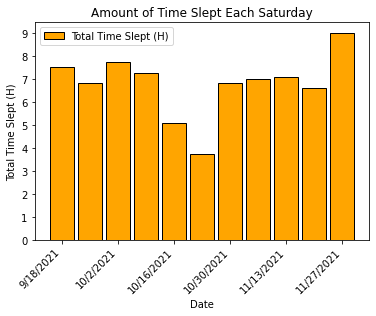

In [75]:
def day_graph(day_of_week, graph_label, title):

    hours_slept_data = []
    day_of_week_dates = []
    index_list = []
    small_index = []
    small_day_of_week_dates = []

    print(sleep_data.at[0, "Day"])
    for x in range(len(sleep_data)):
        if (day_of_week == sleep_data.at[x, "Day"]):
            hours_slept_data.append(sleep_data.at[x, "Total Time Slept (H)"])
            day_of_week_dates.append(sleep_data.at[x, "Date"])
            index_list.append(x)

    for x in range(0,len(day_of_week_dates),2):
        small_index.append(index_list[x])
        small_day_of_week_dates.append(day_of_week_dates[x])

    # print("Day of Week Dates:", day_of_week_dates)
    # print("Hours Slept Data:", hours_slept_data)
    # print("Index List:", index_list)
    # print("Small Index:", small_index)
    # print("Small Day of Week Dates:", small_day_of_week_dates)
    

    y = list(range(len(hours_slept_data)))
    plt.figure()
    plt.bar(index_list, hours_slept_data, facecolor="orange", edgecolor="black", label=graph_label, width=6)
    plt.xticks(small_index, small_day_of_week_dates, rotation=45, ha="right")
    plt.yticks(list(range(10)))
    plt.xlabel("Date")
    plt.ylabel("Total Time Slept (H)")
    plt.title(title)
    plt.legend()
    plt.show()
    #plt.savefig(filename)
    # print(y)    
day_graph("Sunday", "Total Time Slept (H)", "Amount of Time Slept Each Sunday")
day_graph("Monday", "Total Time Slept (H)", "Amount of Time Slept Each Monday")
day_graph("Tuesday", "Total Time Slept (H)", "Amount of Time Slept Each Tuesday")
day_graph("Wednesday", "Total Time Slept (H)", "Amount of Time Slept Each Wednesday")
day_graph("Thursday", "Total Time Slept (H)", "Amount of Time Slept Each Thursday")
day_graph("Friday", "Total Time Slept (H)", "Amount of Time Slept Each Friday")
day_graph("Saturday", "Total Time Slept (H)", "Amount of Time Slept Each Saturday")

### Hypothesis Testing

**1. Identify a null and alternative hypothesis.**  
* $H_0$: The average amount of sleep on the weekends (Friday-Saturday) is greater than or equal to the average amount of sleep during the rest of the week (Sunday-Thursday) ($Sleep_{weekend} \ge Sleep_{rest}$). 
* $H_1$: The average amount of sleep on the weekends (Friday-Saturday) is less than the average amount of sleep during the rest of the week (Sunday-Thursday) ($Sleep_{weekend} < Sleep_{rest}$).

**2. Select the level of significance:**
* $\alpha$ = 0.005

**3. Select the appropriate test statistic.**
* $t = \frac{\overline{X_1}-\overline{X_2}}{\sqrt{S_p^2 (\frac{1}{n_1}+\frac{1}{n_2})}}$

* $S_p^2 = \frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1 + n_2 - 2}$

**4. Formulate the decision value.**  
* $\alpha$ = 0.005  
If t-computed is < t-critical(2.660), then we will reject $H_0$.  
If t-computed is $\ge$ t-critical(2.660), then we will accept $H_0$.

In [76]:
weekend_sleep = []
weekday_sleep = []
weekend_sleep_dates = []
weekday_sleep_dates = []

for x in range(len(sleep_data)):
    if ("Friday" == sleep_data.at[x, "Day"] or "Saturday" == sleep_data.at[x, "Day"]):
        weekend_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])
        
for x in range(len(sleep_data)):
    if ("Sunday" == sleep_data.at[x, "Day"] or "Monday" == sleep_data.at[x, "Day"] or "Tuesday" == sleep_data.at[x, "Day"] or "Wednesday" == sleep_data.at[x, "Day"] or "Thursday" == sleep_data.at[x, "Day"]):
        weekday_sleep.append(sleep_data.at[x, "Total Time Slept (H)"])

weekend_sleep_series = pd.Series(weekend_sleep)
weekday_sleep_series = pd.Series(weekday_sleep)

weekday_sleep_mean = round(weekday_sleep_series.mean(), 2)
weekend_sleep_mean = round(weekend_sleep_series.mean(), 2)

print("Weekday Average:", weekday_sleep_mean)
print("Weekend Average:", weekend_sleep_mean)

t, p = stats.ttest_ind(weekend_sleep_series, weekday_sleep_series)
print("T:", t, "P:", p)

Weekday Average: 6.78
Weekend Average: 7.03
T: nan P: nan


**5. Make a decision**
* **Conclusion:** Since t-computed(.475) was less than the t-critical (2.660), then we must reject $H_0$. This means that the alternative hypothesis is correct and that the average amount of sleep that I get on the weekends is greater than the amount of sleep I get on the weekday. 

Questions/Hypothesis to Consider:
* Which days have the highest and lowest amount of sleep?
* How much sleep will I get depending on the day?
* Does the weather affect how much sleep I get?
*